Projet OC n°2 : Participez à un concours sur la Smart City
==========================================================

I. Présentation générale du jeu de données
******************************************

In [1]:
# import des librairies dont nous aurons besoin
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from wordcloud import WordCloud

# chargement et affichage des données/p2-arbres-fr.csv
data_path = '../Data/p2-arbres-fr.csv'
data = pd.read_csv(data_path, delimiter=';')

In [2]:
data.head()

id type_emplacement domanialite   arrondissement complement_addresse  \
0  99874            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
1  99875            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
2  99876            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
3  99877            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
4  99878            Arbre      Jardin  PARIS 17E ARRDT                 NaN   

   numero                                        lieu id_emplacement  \
0     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20   
2     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             21   
3     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             22   
4     NaN  PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0037   

  libelle_francais      genre         espece variete  circonference_cm  \
0       Marronnier   Aesculus  hippocastanum     NaN                20   
1               If      Taxus        baccata     NaN                65   
2               If      Taxus        baccata     NaN                90   
3           Erable       Acer        negundo     NaN                60   
4     Arbre à miel  Tetradium      daniellii     NaN                38   

   hauteur_m stade_developpement  remarquable  geo_point_2d_a  geo_point_2d_b  
0          5                 NaN          0.0       48.857620        2.320962  
1          8                   A          NaN       48.857656        2.321031  
2         10                   A          NaN       48.857705        2.321061  
3          8                   A          NaN       48.857722        2.321006  
4          0                 NaN          NaN       48.890435        2.315289

In [3]:
datas = data.shape
columns = datas[1]
rows = datas[0]
data_type = data.dtypes.value_counts()
var_qual = data_type.iloc[0]
var_quant = data_type.iloc[1] + data_type.iloc[2]
values = data.size

print("\033[1m" + "\033[91m" + "Informations importantes :" + "\033[0m" + "\n")
print(f"Total colonnes : {columns} variables.\n")
print(f"    -> {var_qual} variables qualitatives.")
print(f"    -> {var_quant} variables quantitatives.")
print(f"\nTotal lignes : {rows} individus.")
print(f"\nTotal : {values} valeurs.")

Informations importantes :

Total colonnes : 18 variables.

    -> 11 variables qualitatives.
    -> 7 variables quantitatives.

Total lignes : 200137 individus.

Total : 3602466 valeurs.


Pourcentage de valeurs nulles par variables : 

 id                       0.0
type_emplacement         0.0
domanialite              0.0
arrondissement           0.0
complement_addresse     85.0
numero                 100.0
lieu                     0.0
id_emplacement           0.0
libelle_francais         1.0
genre                    0.0
espece                   1.0
variete                 82.0
circonference_cm         0.0
hauteur_m                0.0
stade_developpement     34.0
remarquable             32.0
geo_point_2d_a           0.0
geo_point_2d_b           0.0
dtype: float64


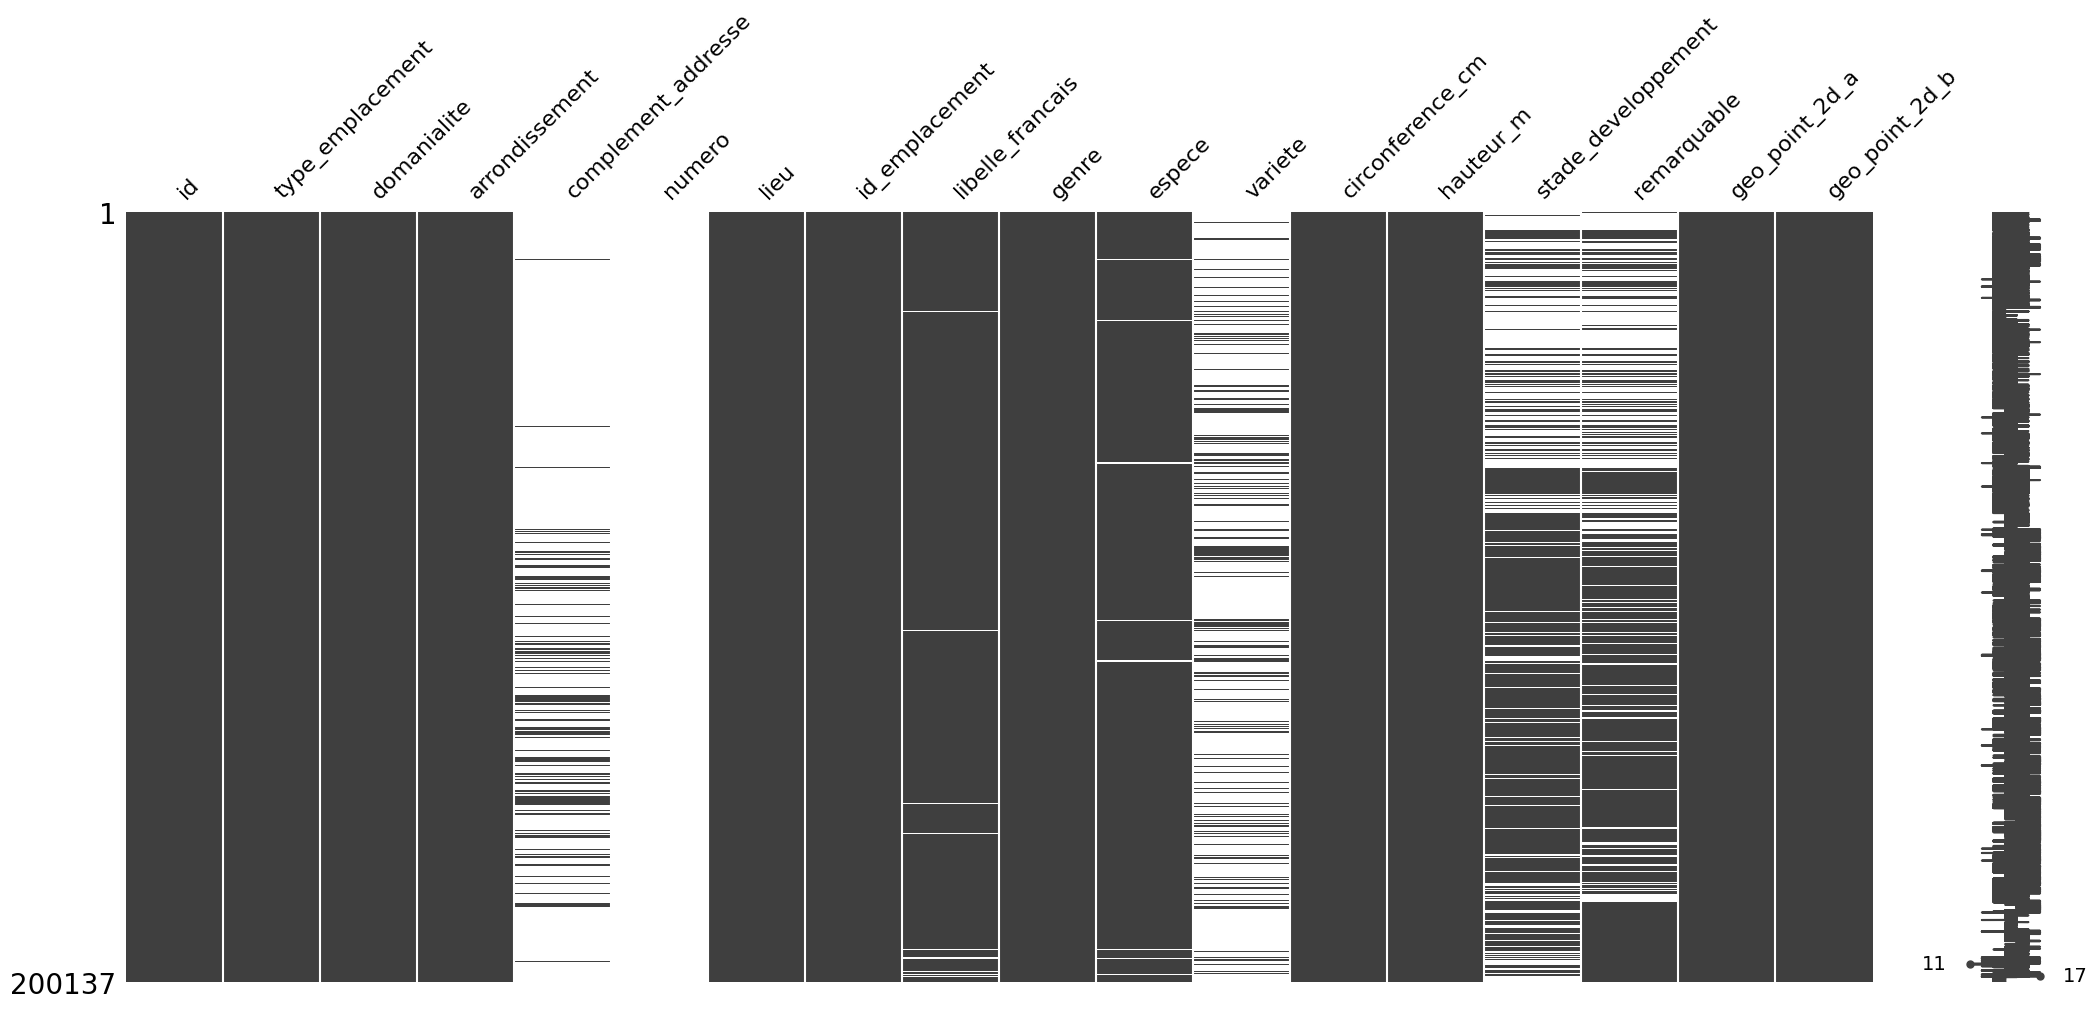

In [4]:
msno.matrix(data)

print("Pourcentage de valeurs nulles par variables : \n\n", (data.isna().mean() * 100).round(0))

In [5]:
data.describe()

id  numero  circonference_cm      hauteur_m    remarquable  \
count  2.001370e+05     0.0     200137.000000  200137.000000  137039.000000   
mean   3.872027e+05     NaN         83.380479      13.110509       0.001343   
std    5.456032e+05     NaN        673.190213    1971.217387       0.036618   
min    9.987400e+04     NaN          0.000000       0.000000       0.000000   
25%    1.559270e+05     NaN         30.000000       5.000000       0.000000   
50%    2.210780e+05     NaN         70.000000       8.000000       0.000000   
75%    2.741020e+05     NaN        115.000000      12.000000       0.000000   
max    2.024745e+06     NaN     250255.000000  881818.000000       1.000000   

       geo_point_2d_a  geo_point_2d_b  
count   200137.000000   200137.000000  
mean        48.854491        2.348208  
std          0.030234        0.051220  
min         48.742290        2.210241  
25%         48.835021        2.307530  
50%         48.854162        2.351095  
75%         48.876447        2.386838  
max         48.911485        2.469759

In [6]:
var_qual = ['type_emplacement',
            'domanialite',
            'arrondissement',
            'complement_addresse',
            'lieu',
            'id_emplacement',
            'libelle_francais',
            'genre',
            'espece',
            'variete',
            'stade_developpement']
print("Description des variables qualitatives : \n")
for var in var_qual:
    print(var.upper(), " : ", data[var].nunique())
    print(data[var].value_counts(), "\n")

Description des variables qualitatives : 

TYPE_EMPLACEMENT  :  1
type_emplacement
Arbre    200137
Name: count, dtype: int64 

DOMANIALITE  :  9
domanialite
Alignement      104949
Jardin           46262
CIMETIERE        31926
DASCO             6422
PERIPHERIQUE      5327
DJS               3900
DFPE              1325
DAC                 21
DASES                4
Name: count, dtype: int64 

ARRONDISSEMENT  :  25
arrondissement
PARIS 15E ARRDT      17151
PARIS 13E ARRDT      16712
PARIS 16E ARRDT      16403
PARIS 20E ARRDT      15340
PARIS 19E ARRDT      13709
PARIS 12E ARRDT      12600
SEINE-SAINT-DENIS    11570
BOIS DE VINCENNES    11510
PARIS 14E ARRDT      11399
PARIS 17E ARRDT      10762
PARIS 18E ARRDT      10011
PARIS 7E ARRDT        8617
VAL-DE-MARNE          7580
PARIS 8E ARRDT        7245
PARIS 11E ARRDT       5658
HAUTS-DE-SEINE        5298
BOIS DE BOULOGNE      3978
PARIS 10E ARRDT       3385
PARIS 4E ARRDT        2740
PARIS 5E ARRDT        2368
PARIS 6E ARRDT        1764
PARI

In [7]:
print("Nombre de données en double : ", data.duplicated().sum())

Nombre de données en double :  0


II. Démarche méthodologique d’analyse et de nettoyage des données
*****************************************************************

A. Exclusion des variables inutiles

    - id → que des valeurs uniques
    - numero → que des valeurs nulles
    - type_emplacement → une valeur fixe : Arbre
    - complement_addresse → pourcentage de valeurs nulles et cardinalité très élevés
    - id_emplacement → superflu pour l'analyse

In [8]:
data.drop(['id', 'numero', 'type_emplacement', 'complement_addresse', 'id_emplacement'], axis=1, inplace=True)
data.head()

domanialite   arrondissement                                        lieu  \
0      Jardin   PARIS 7E ARRDT   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E   
1      Jardin   PARIS 7E ARRDT   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E   
2      Jardin   PARIS 7E ARRDT   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E   
3      Jardin   PARIS 7E ARRDT   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E   
4      Jardin  PARIS 17E ARRDT  PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING   

  libelle_francais      genre         espece variete  circonference_cm  \
0       Marronnier   Aesculus  hippocastanum     NaN                20   
1               If      Taxus        baccata     NaN                65   
2               If      Taxus        baccata     NaN                90   
3           Erable       Acer        negundo     NaN                60   
4     Arbre à miel  Tetradium      daniellii     NaN                38   

   hauteur_m stade_developpement  remarquable  geo_point_2d_a  geo_point_2d_b  
0          5                 NaN          0.0       48.857620        2.320962  
1          8                   A          NaN       48.857656        2.321031  
2         10                   A          NaN       48.857705        2.321061  
3          8                   A          NaN       48.857722        2.321006  
4          0                 NaN          NaN       48.890435        2.315289

B. Traitement des doublons

In [9]:
data.drop_duplicates(inplace=True)

C. Traitement des valeurs nulles

In [10]:
data.isna()

domanialite  arrondissement   lieu  libelle_francais  genre  espece  \
0             False           False  False             False  False   False   
1             False           False  False             False  False   False   
2             False           False  False             False  False   False   
3             False           False  False             False  False   False   
4             False           False  False             False  False   False   
...             ...             ...    ...               ...    ...     ...   
200132        False           False  False              True  False   False   
200133        False           False  False             False  False   False   
200134        False           False  False             False  False   False   
200135        False           False  False             False  False   False   
200136        False           False  False             False  False   False   

        variete  circonference_cm  hauteur_m  stade_developpement  \
0          True             False      False                 True   
1          True             False      False                False   
2          True             False      False                False   
3          True             False      False                False   
4          True             False      False                 True   
...         ...               ...        ...                  ...   
200132     True             False      False                 True   
200133     True             False      False                 True   
200134     True             False      False                 True   
200135     True             False      False                 True   
200136     True             False      False                 True   

        remarquable  geo_point_2d_a  geo_point_2d_b  
0             False           False           False  
1              True           False           False  
2              True           False           False  
3              True           False           False  
4              True           False           False  
...             ...             ...             ...  
200132        False           False           False  
200133        False           False           False  
200134        False           False           False  
200135        False           False           False  
200136        False           False           False  

[200135 rows x 13 columns]

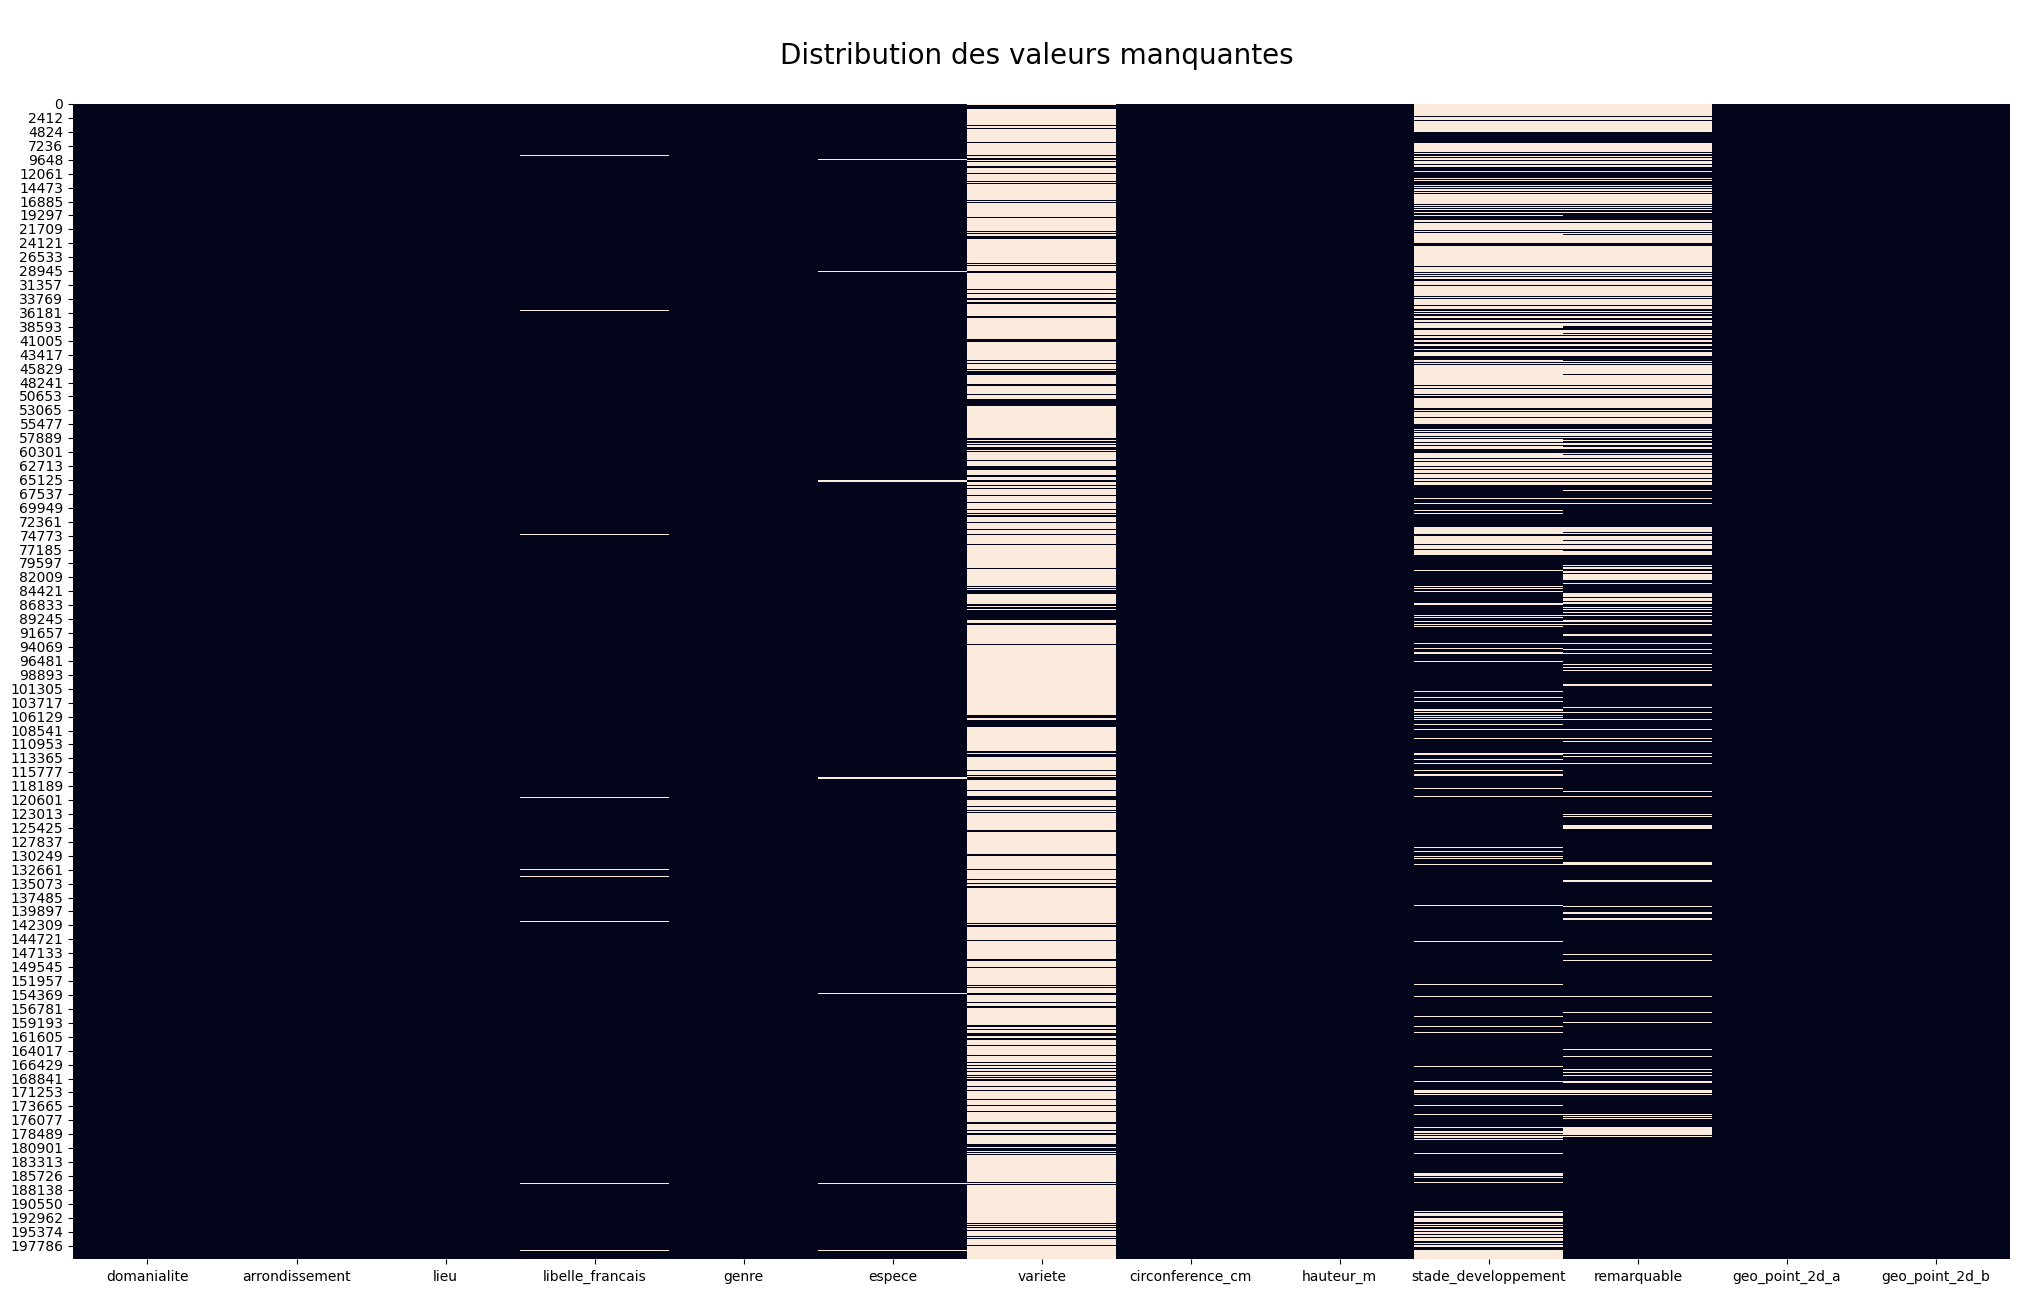

In [11]:
plt.figure(figsize=(25,15))
plt.title("\nDistribution des valeurs manquantes \n", fontsize=20)
sns.heatmap(data.isna(), cbar=False)
plt.show()

In [12]:
total_nan = data.isna().sum().sum()
percent_nan = ((total_nan / data.size) * 100).round(0)
print("Nombre total de valeurs manquantes dans le dataset = ", total_nan, "-->", percent_nan, "% \n")

nan_per_column = data.isna().sum().sort_values(ascending=True)
percent_nan_per_column = ((nan_per_column / data.shape[0]).sort_values(ascending=True) * 100)
print("Pourcentage de valeurs manquantes par colonne :")
print(percent_nan_per_column)
print()
print("Nombre de valeurs manquantes par colonne :")
print(nan_per_column)

Nombre total de valeurs manquantes dans le dataset =  296924 --> 11.0 % 

Pourcentage de valeurs manquantes par colonne :
arrondissement          0.000000
lieu                    0.000000
circonference_cm        0.000000
hauteur_m               0.000000
geo_point_2d_a          0.000000
geo_point_2d_b          0.000000
domanialite             0.000500
genre                   0.007995
libelle_francais        0.747995
espece                  0.875409
remarquable            31.527219
stade_developpement    33.578834
variete                81.623904
dtype: float64

Nombre de valeurs manquantes par colonne :
arrondissement              0
lieu                        0
circonference_cm            0
hauteur_m                   0
geo_point_2d_a              0
geo_point_2d_b              0
domanialite                 1
genre                      16
libelle_francais         1497
espece                   1752
remarquable             63097
stade_developpement     67203
variete                163358


Exclusion des variables avec plus de 80% de valeurs manquantes.

In [13]:
sup_80pct_na = data.isna().sum()/data.shape[0] < 0.8
data = data[data.columns[sup_80pct_na]]

Exclusion des individus avec moins de 20% de valeurs manquantes.

In [14]:
inf_80pct_na = ['domanialite', 'libelle_francais', 'genre', 'espece']
data.dropna(subset = inf_80pct_na, inplace=True)

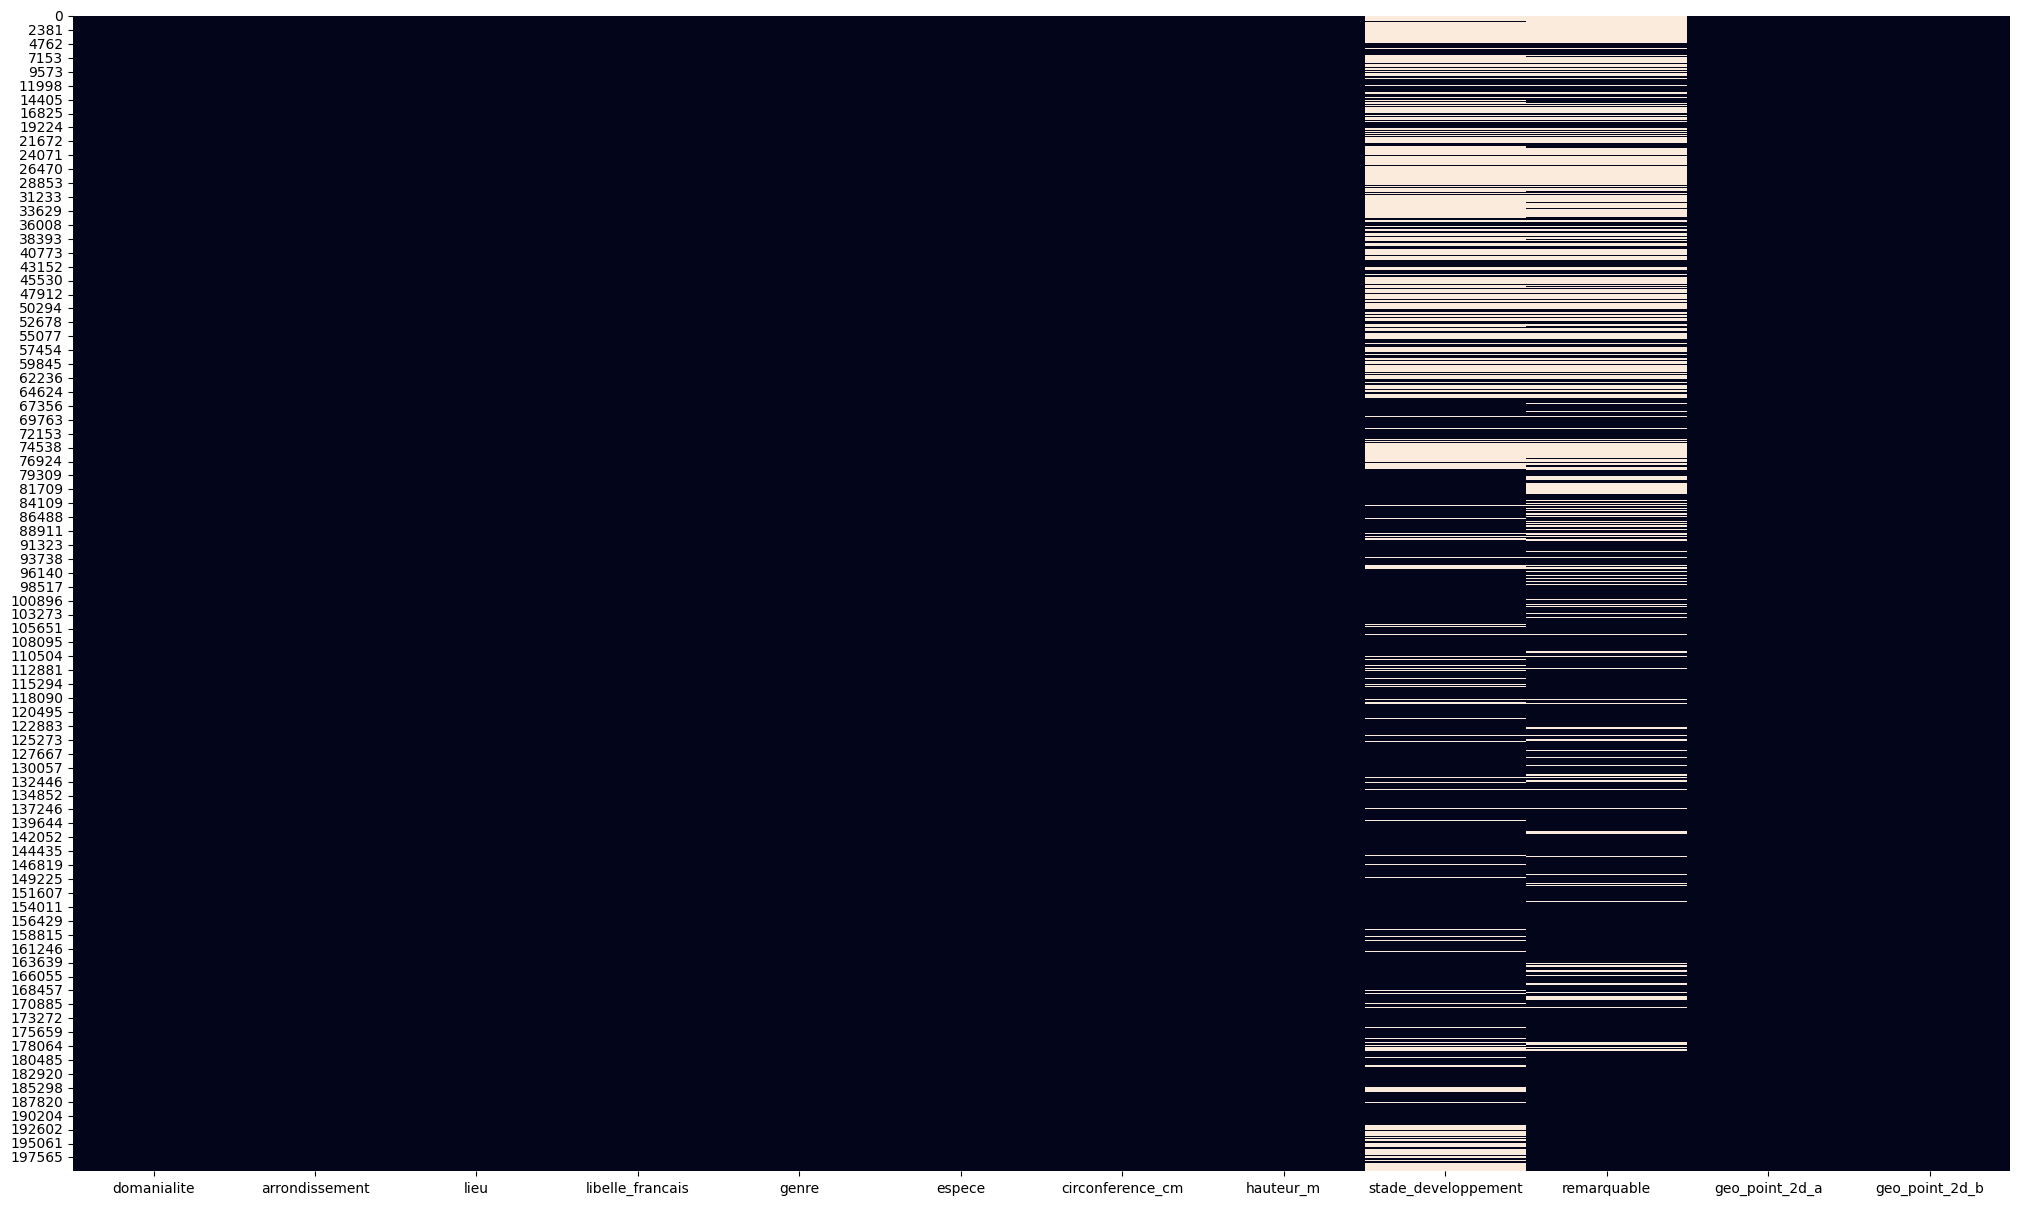

In [15]:
plt.figure(figsize=(25,15))
sns.heatmap(data.isna(), cbar=False)
plt.show()

D. Traitement des valeurs aberrantes

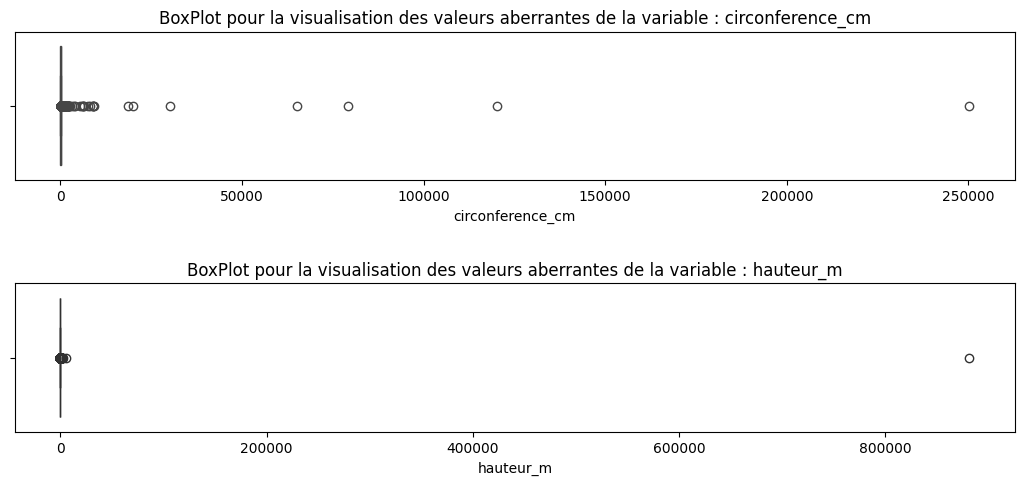

In [16]:
def box_plot(data, var, color, title):
    sns.boxplot(x=var, data=data, color=color)
    plt.title(title)

plt.figure(figsize=(10,10))
plt.gcf().subplots_adjust(left = 0, bottom = 0.3, right = 1, top = 0.7, wspace = 0, hspace = 0.7)

plt.subplot(2, 1, 1)
box_plot(data, 'circonference_cm', '#EB5600', "BoxPlot pour la visualisation des valeurs aberrantes de la variable : circonference_cm")

plt.subplot(2, 1, 2)
box_plot(data, 'hauteur_m', '#2A7764', "BoxPlot pour la visualisation des valeurs aberrantes de la variable : hauteur_m")

Exclusion des individus avec des valeurs abérantes :

    - circonference_cm → individus supérieur à 1600 cm individus exclut 
    - hauteur_m → individus supérieur à 70 m exclut



In [17]:
circ_max = (data["circonference_cm"] >= 1600).sum()
haut_max = (data["hauteur_m"] >= 70).sum()
print("Exclusion de", circ_max + haut_max ,"individus :\n-", 
      circ_max, "avec une circonférence de plus de 16 mètres\n-", haut_max, "avec une hauteur supérieure à 70 mètres")

Exclusion de 382 individus :
- 33 avec une circonférence de plus de 16 mètres
- 349 avec une hauteur supérieure à 70 mètres


In [18]:
data = data[(data["circonference_cm"] > 0) & (data["circonference_cm"] < 1600)]
data = data[(data["hauteur_m"] > 0) & (data["hauteur_m"] < 70)]

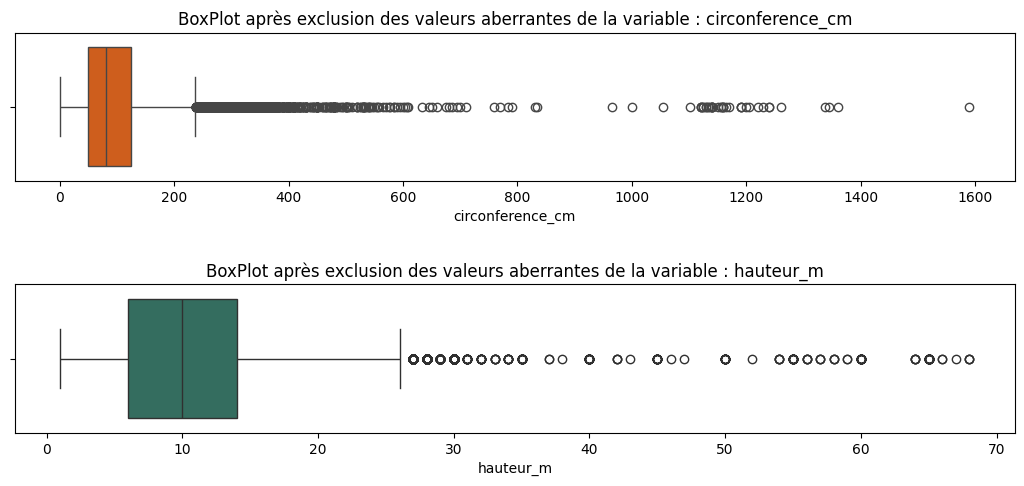

In [19]:
plt.figure(figsize=(10,10))
plt.gcf().subplots_adjust(left = 0, bottom = 0.3, right = 1, top = 0.7, wspace = 0, hspace = 0.7)

plt.subplot(2, 1, 1)
box_plot(data, 'circonference_cm', '#EB5600', "BoxPlot après exclusion des valeurs aberrantes de la variable : circonference_cm")

plt.subplot(2, 1, 2)
box_plot(data, 'hauteur_m', '#2A7764', "BoxPlot après exclusion des valeurs aberrantes de la variable : hauteur_m")

E. Traitement des valeurs atypiques

In [20]:
def exclude_outliers(var, data):
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    return data.query(f"{var} >= {Q1-1.5*IQR} and {var} <= {Q3+1.5*IQR}")

In [21]:
av = "valeurs avant exclusion pour la variable --> " 
ap = "valeurs après exclusion pour la variable --> "
c = 'circonference_cm'
h = 'hauteur_m'

print(data[c].count(), av + c)
data = exclude_outliers(c, data)
print(data[c].count(), ap + c)
print(data[h].count(), av + h)
data = exclude_outliers(h, data)
print(data[h].count(), ap + c)

157943 valeurs avant exclusion pour la variable --> circonference_cm
154273 valeurs après exclusion pour la variable --> circonference_cm
154273 valeurs avant exclusion pour la variable --> hauteur_m
153795 valeurs après exclusion pour la variable --> circonference_cm


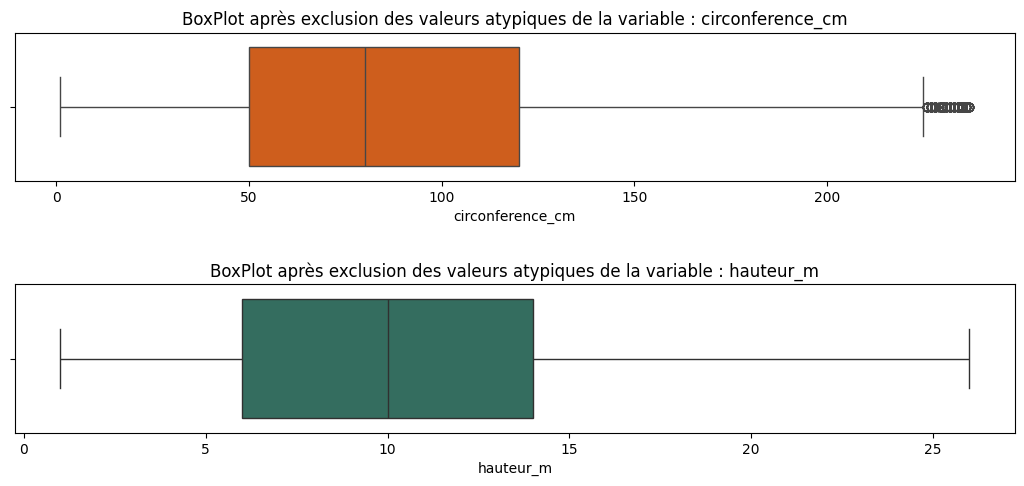

In [22]:
plt.figure(figsize=(10,10))
plt.gcf().subplots_adjust(left = 0, bottom = 0.3, right = 1, top = 0.7, wspace = 0, hspace = 0.7)

plt.subplot(2, 1, 1)
box_plot(data, 'circonference_cm', '#EB5600', "BoxPlot après exclusion des valeurs atypiques de la variable : circonference_cm")

plt.subplot(2, 1, 2)
box_plot(data, 'hauteur_m', '#2A7764', "BoxPlot après exclusion des valeurs atypiques de la variable : hauteur_m")

F. Modification dtype des variables qualitatives

In [23]:
for col in data.select_dtypes('object'):
    data[col] = data[col].astype("category")
data['remarquable'] = data['remarquable'].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153795 entries, 0 to 198878
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   domanialite          153795 non-null  category
 1   arrondissement       153795 non-null  category
 2   lieu                 153795 non-null  category
 3   libelle_francais     153795 non-null  category
 4   genre                153795 non-null  category
 5   espece               153795 non-null  category
 6   circonference_cm     153795 non-null  int64   
 7   hauteur_m            153795 non-null  int64   
 8   stade_developpement  124958 non-null  category
 9   remarquable          122218 non-null  category
 10  geo_point_2d_a       153795 non-null  float64 
 11  geo_point_2d_b       153795 non-null  float64 
dtypes: category(8), float64(2), int64(2)
memory usage: 7.8 MB


III. Synthèse de l’analyse de données et visualisation des données
******************************************************************

A. Analyse des données après nettoyage

In [24]:
cleaned_data = data.copy(deep=True)
cleaned_data.to_csv("../Data/cleaned_data.csv")
data = pd.read_csv(data_path, delimiter=';')

In [25]:
# data
data_size = data.shape
nb_rows_d = data_size[0]
nb_columns_d = data_size[1]

# cleaned_data
cleaned_data_size = cleaned_data.shape
nb_rows_cd = cleaned_data_size[0]
nb_columns_cd = cleaned_data_size[1]

print(f"Nombre d'individus avant nettoyage : {nb_rows_d}")
print(f"Nombre d'individus après nettoyage : {nb_rows_cd}\n")

print(f"Nombre de variables avant nettoyage : {nb_columns_d}")
print(f"Nombre de variables après nettoyage : {nb_columns_cd}\n")

print(f"Nombre de valeurs avant nettoyage : {data.size}")
print(f"Nombre de valeurs après nettoyage : {cleaned_data.size}\n")

print(cleaned_data.dtypes)

print(f"\n--> 8 variables qualitatives")
print(f"--> 4 variables quantitatives")

Nombre d'individus avant nettoyage : 200137
Nombre d'individus après nettoyage : 153795

Nombre de variables avant nettoyage : 18
Nombre de variables après nettoyage : 12

Nombre de valeurs avant nettoyage : 3602466
Nombre de valeurs après nettoyage : 1845540

domanialite            category
arrondissement         category
lieu                   category
libelle_francais       category
genre                  category
espece                 category
circonference_cm          int64
hauteur_m                 int64
stade_developpement    category
remarquable            category
geo_point_2d_a          float64
geo_point_2d_b          float64
dtype: object

--> 8 variables qualitatives
--> 4 variables quantitatives


In [26]:
cleaned_data.describe()

circonference_cm      hauteur_m  geo_point_2d_a  geo_point_2d_b
count     153795.000000  153795.000000   153795.000000   153795.000000
mean          88.232706      10.112123       48.855999        2.345880
std           50.888713       4.807271        0.025745        0.049414
min            1.000000       1.000000       48.742290        2.210416
25%           50.000000       6.000000       48.836971        2.307115
50%           80.000000      10.000000       48.855253        2.348420
75%          120.000000      14.000000       48.874142        2.383224
max          237.000000      26.000000       48.911485        2.469759

In [27]:
for var in cleaned_data.select_dtypes('category'):
    print(cleaned_data[var].nunique(), " catégories pour la variable : ", var)
print()    
for var in cleaned_data.select_dtypes('category'):
    print(cleaned_data[var].nunique(), " catégories pour la variable :")
    print(data[var].value_counts(), "\n")

9  catégories pour la variable :  domanialite
25  catégories pour la variable :  arrondissement
5384  catégories pour la variable :  lieu
168  catégories pour la variable :  libelle_francais
145  catégories pour la variable :  genre
366  catégories pour la variable :  espece
4  catégories pour la variable :  stade_developpement
2  catégories pour la variable :  remarquable

9  catégories pour la variable :
domanialite
Alignement      104949
Jardin           46262
CIMETIERE        31926
DASCO             6422
PERIPHERIQUE      5327
DJS               3900
DFPE              1325
DAC                 21
DASES                4
Name: count, dtype: int64 

25  catégories pour la variable :
arrondissement
PARIS 15E ARRDT      17151
PARIS 13E ARRDT      16712
PARIS 16E ARRDT      16403
PARIS 20E ARRDT      15340
PARIS 19E ARRDT      13709
PARIS 12E ARRDT      12600
SEINE-SAINT-DENIS    11570
BOIS DE VINCENNES    11510
PARIS 14E ARRDT      11399
PARIS 17E ARRDT      10762
PARIS 18E ARRDT      100

B. Visualisation des variables quantitatives après nettoyage

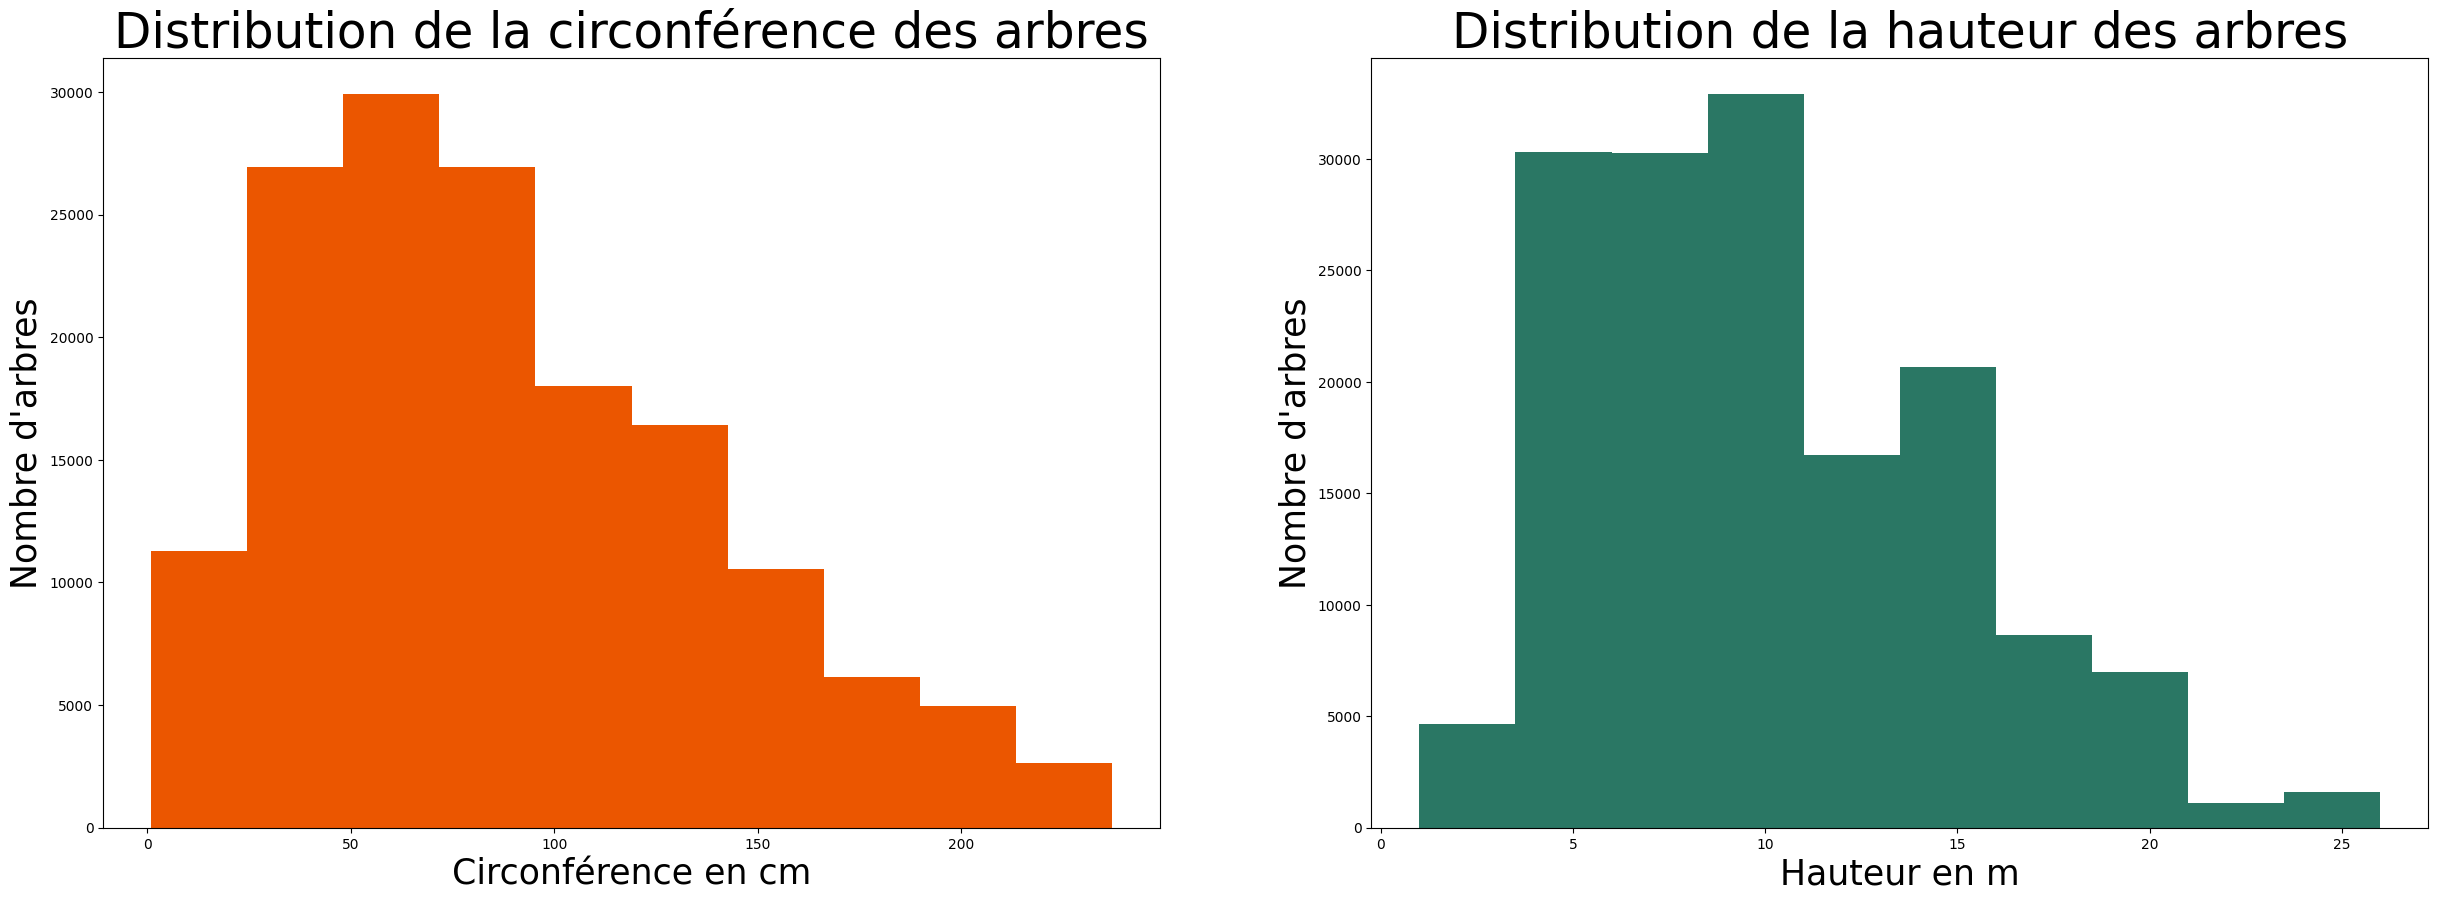

In [28]:
def histogram_plot(data, var, color, x_label, y_label, title):
    plt.hist(data[var], color=color)
    plt.xlabel(x_label, fontsize=25)
    plt.ylabel(y_label, fontsize=25)
    plt.title(title, fontsize=35)

plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
histogram_plot(cleaned_data, 'circonference_cm', '#EB5600', "Circonférence en cm", "Nombre d'arbres", "Distribution de la circonférence des arbres")

plt.subplot(1, 2, 2)
histogram_plot(cleaned_data, 'hauteur_m', '#2A7764', "Hauteur en m", "Nombre d'arbres", "Distribution de la hauteur des arbres")

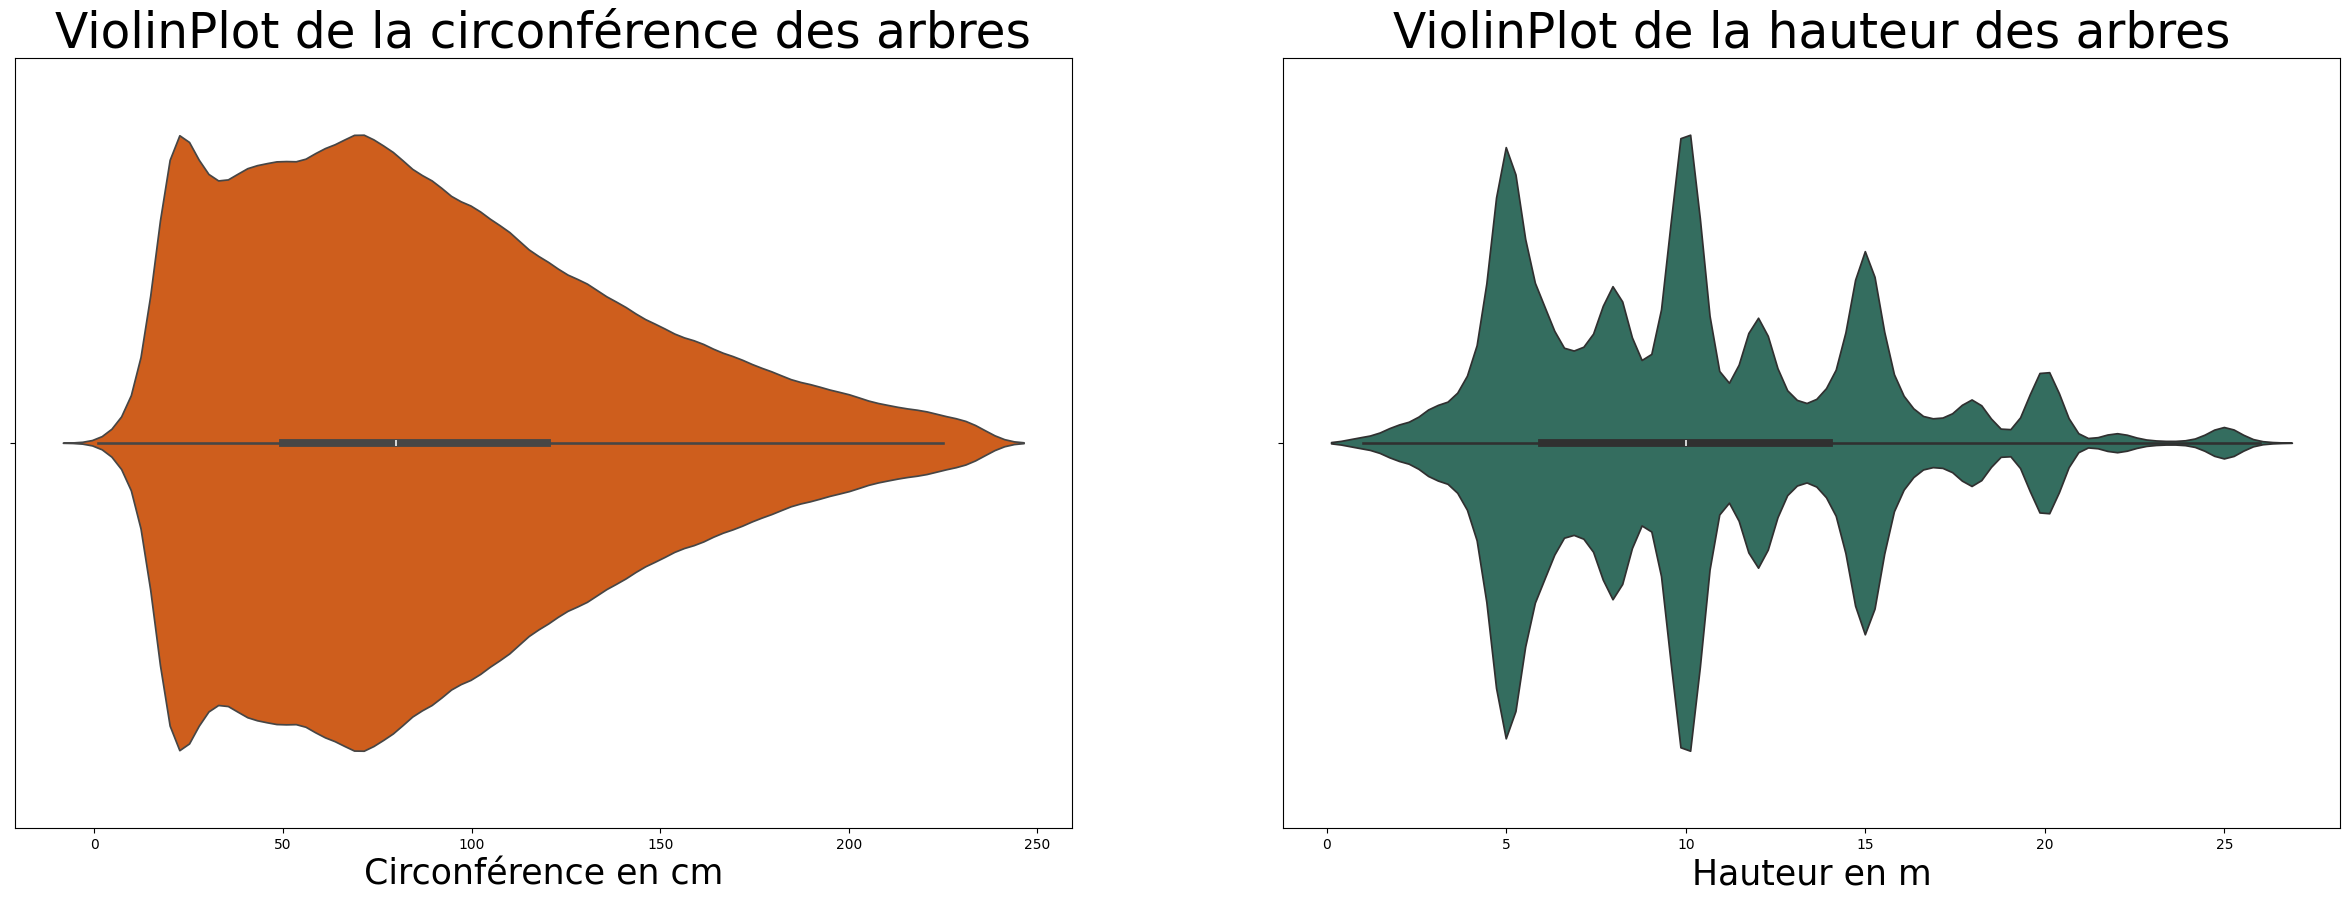

In [29]:
def violin_plot(data, var, color, x_label, y_label, title):
    sns.violinplot(x=var, data=data, color=color)
    plt.xlabel(x_label, fontsize=25)
    plt.title(title, fontsize=35)

plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
violin_plot(cleaned_data, 'circonference_cm', '#EB5600', "Circonférence en cm", "Nombre d'arbres", "ViolinPlot de la circonférence des arbres")

plt.subplot(1, 2, 2)
violin_plot(cleaned_data, 'hauteur_m', '#2A7764', "Hauteur en m", "Nombre d'arbres", "ViolinPlot de la hauteur des arbres")

C. Visualisation des variables qualitatives après nettoyage

In [30]:
var_low_cardinality = ['stade_developpement','remarquable']
var_medium_cardinality = ['domanialite','arrondissement']
var_high_cardinality = ['lieu', 'libelle_francais', 'genre', 'espece']

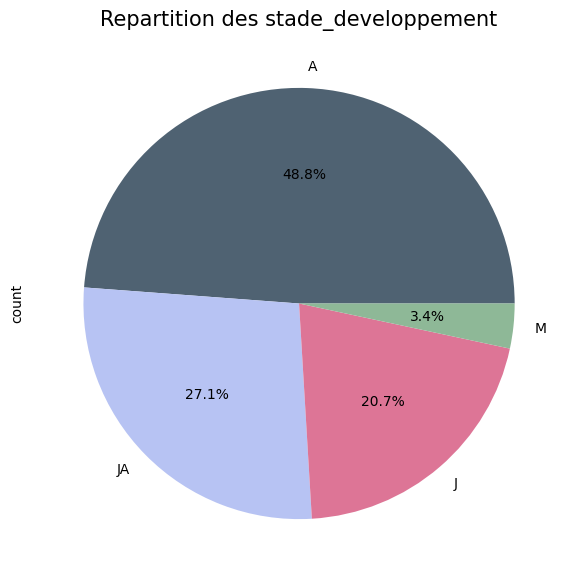

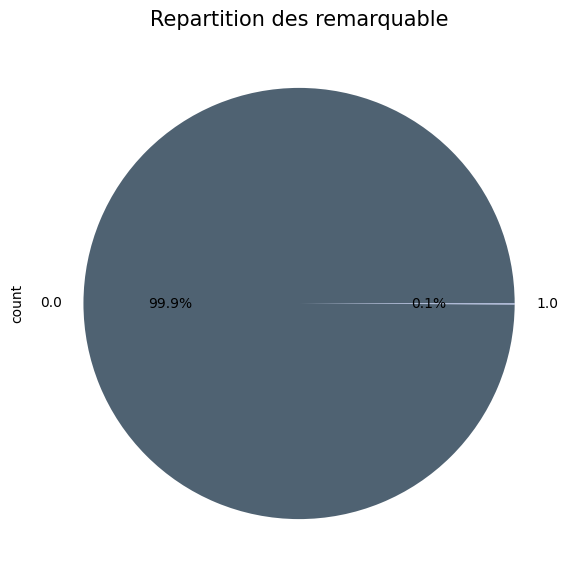

In [31]:
for col in var_low_cardinality:
    plt.figure(figsize=(10,7))
    plt.title('Repartition des ' + col, fontsize=15)
    cleaned_data[col].value_counts().plot.pie(autopct='%1.1f%%', colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
    plt.show()

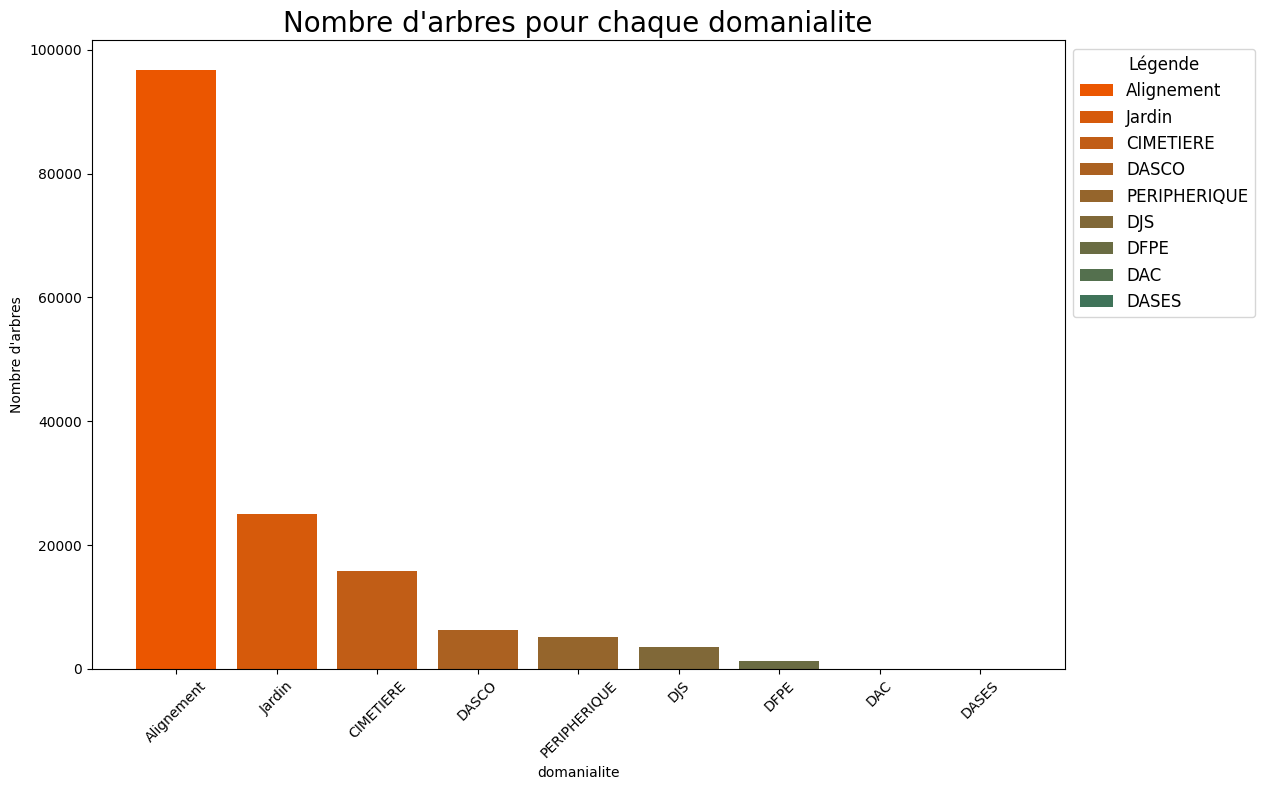

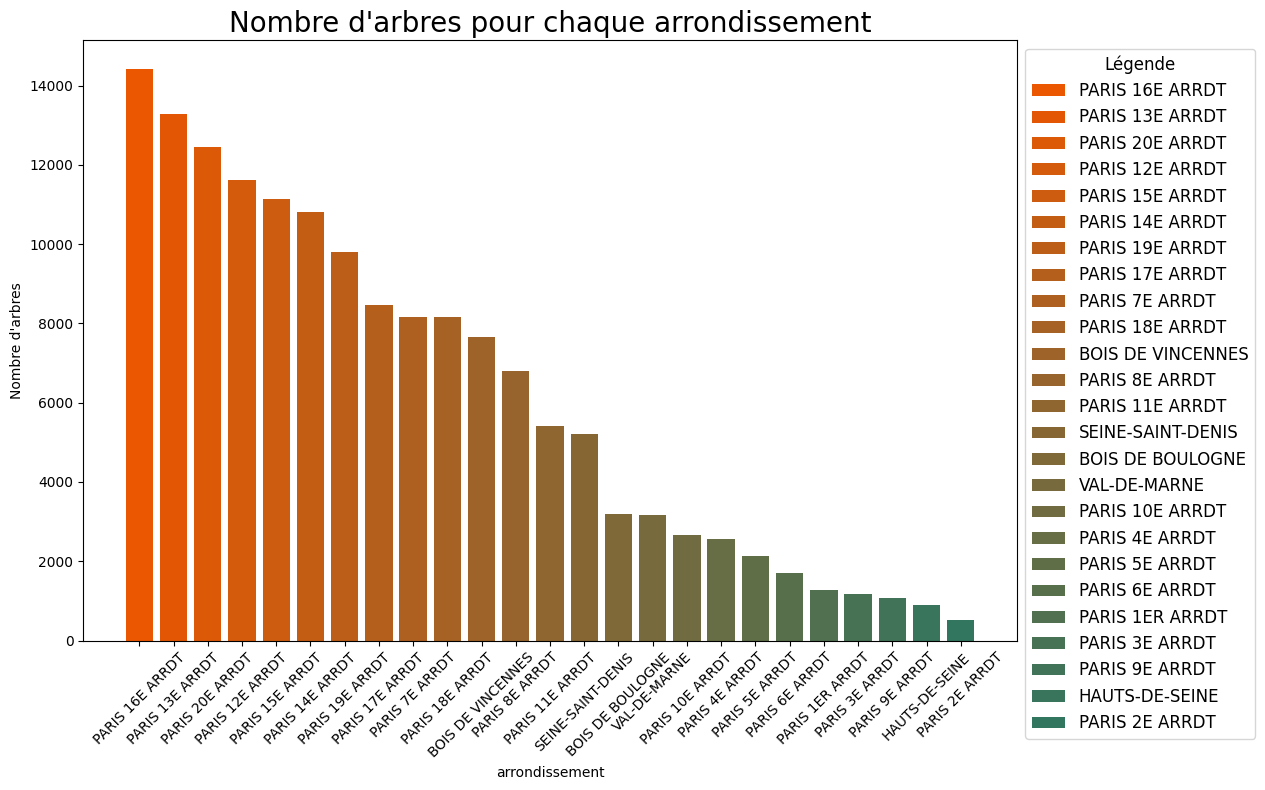

In [32]:
color1 = '#EB5600'
color2 = '#2A7764'

for var in var_medium_cardinality:
    cmap = LinearSegmentedColormap.from_list('custom', [color1, color2])
    value_counts = cleaned_data[var].value_counts()
    plt.figure(figsize=(15,8))
    bars = []
    for i, (value, count) in enumerate(value_counts.items()):
        bar = plt.bar(value, count, color=cmap(i / len(value_counts)))
        bars.append(bar[0])
    plt.title("Nombre d'arbres pour chaque " + var, fontsize=20)
    plt.xlabel(var)
    plt.ylabel("Nombre d'arbres")
    plt.xticks(rotation=45)
    leg = plt.legend(bars, value_counts.index, loc='upper left', bbox_to_anchor=(1, 1), fontsize='large', title="Légende", title_fontsize='large')
    plt.tight_layout(rect=[0,0,0.85,1])
    plt.show()

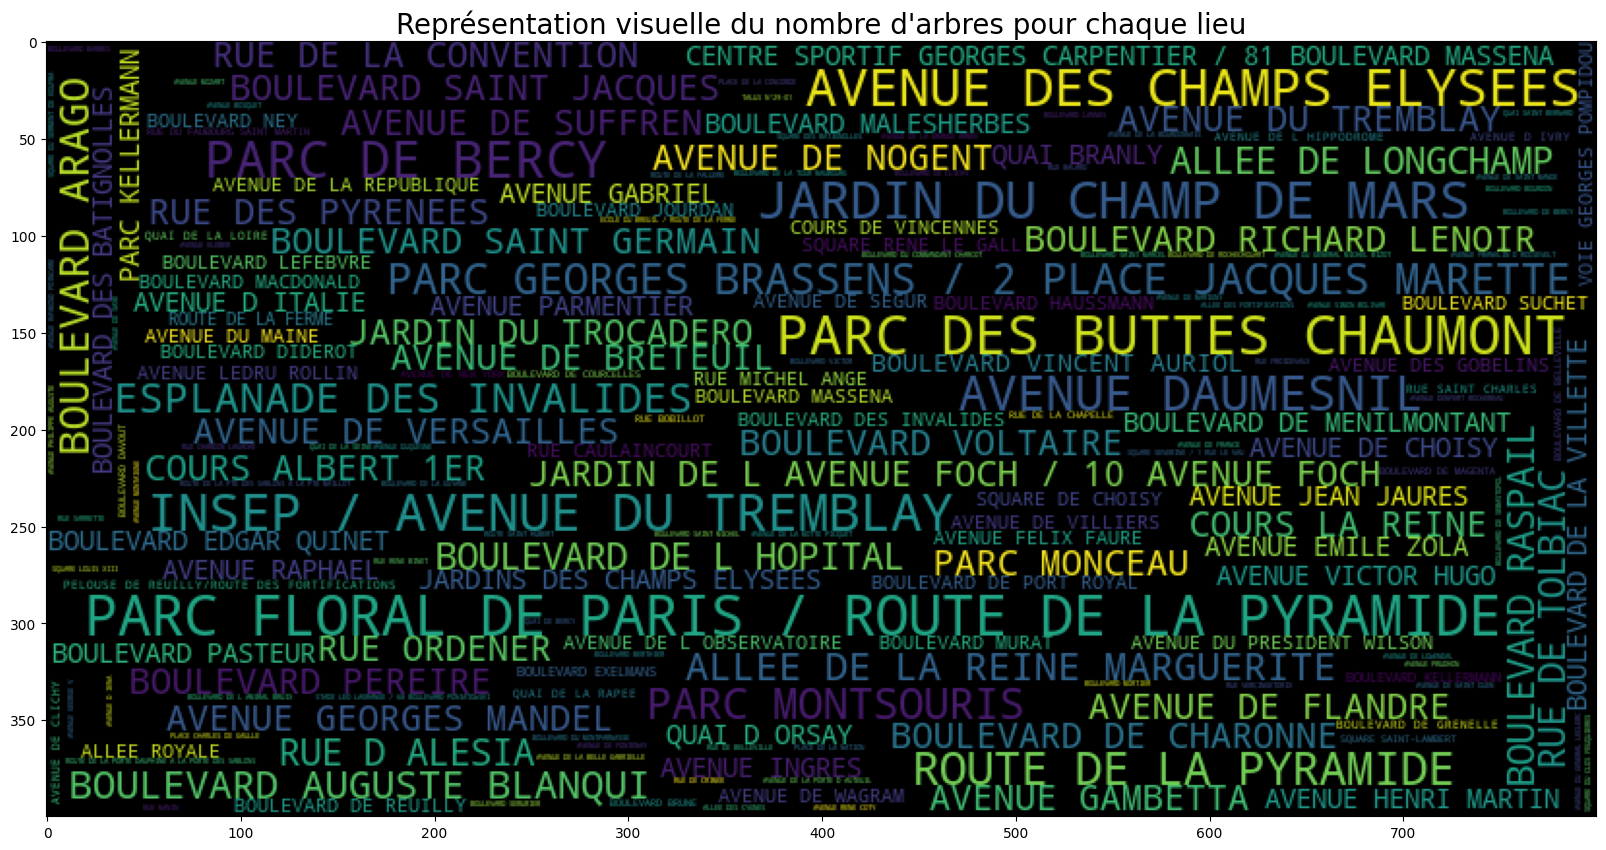

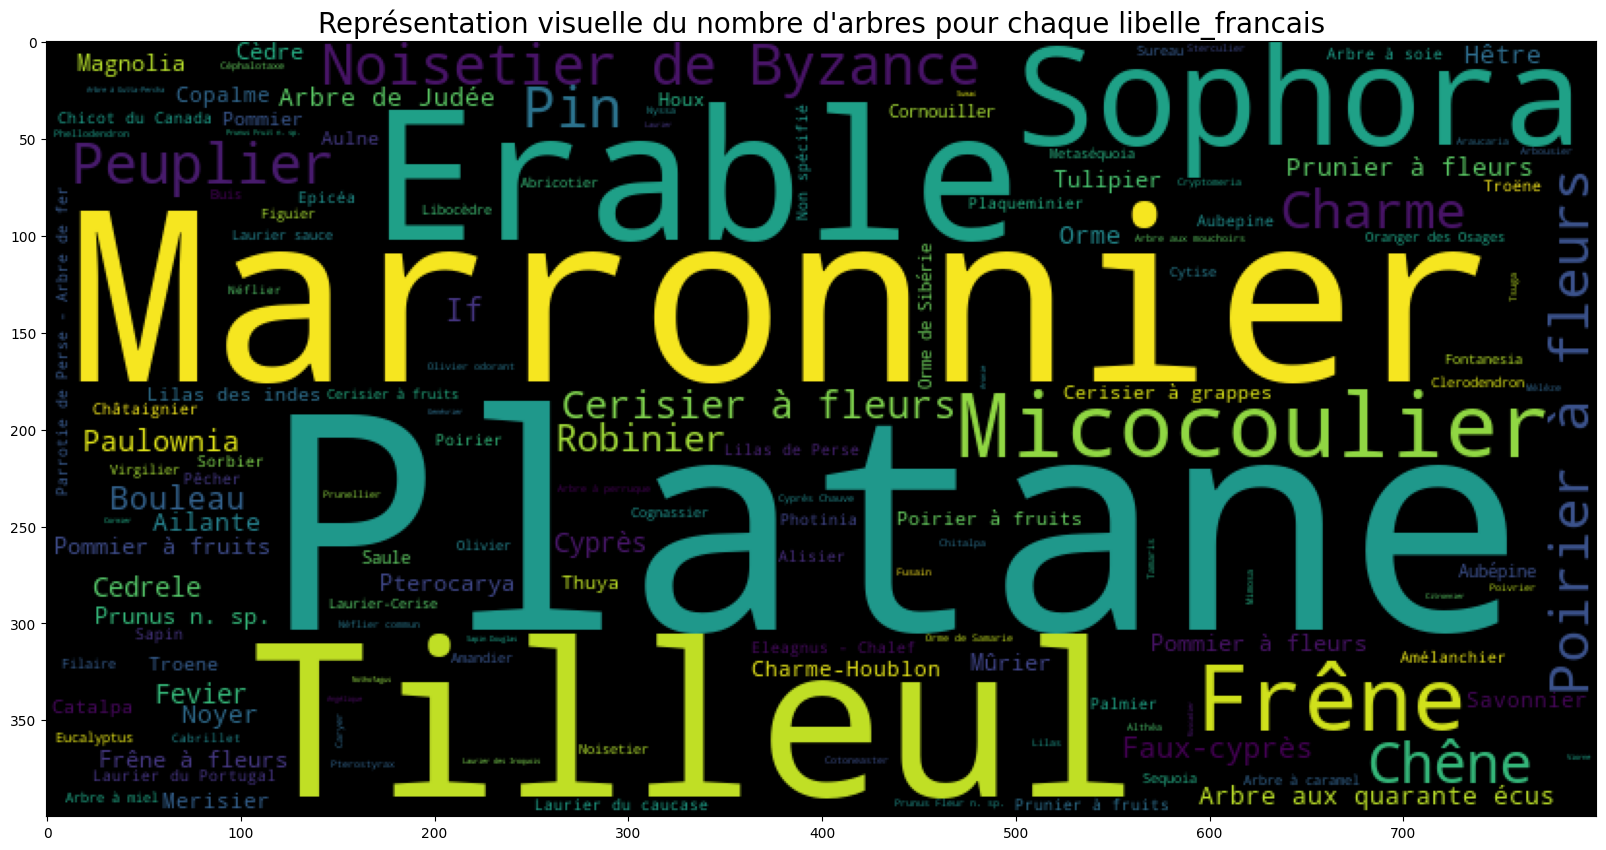

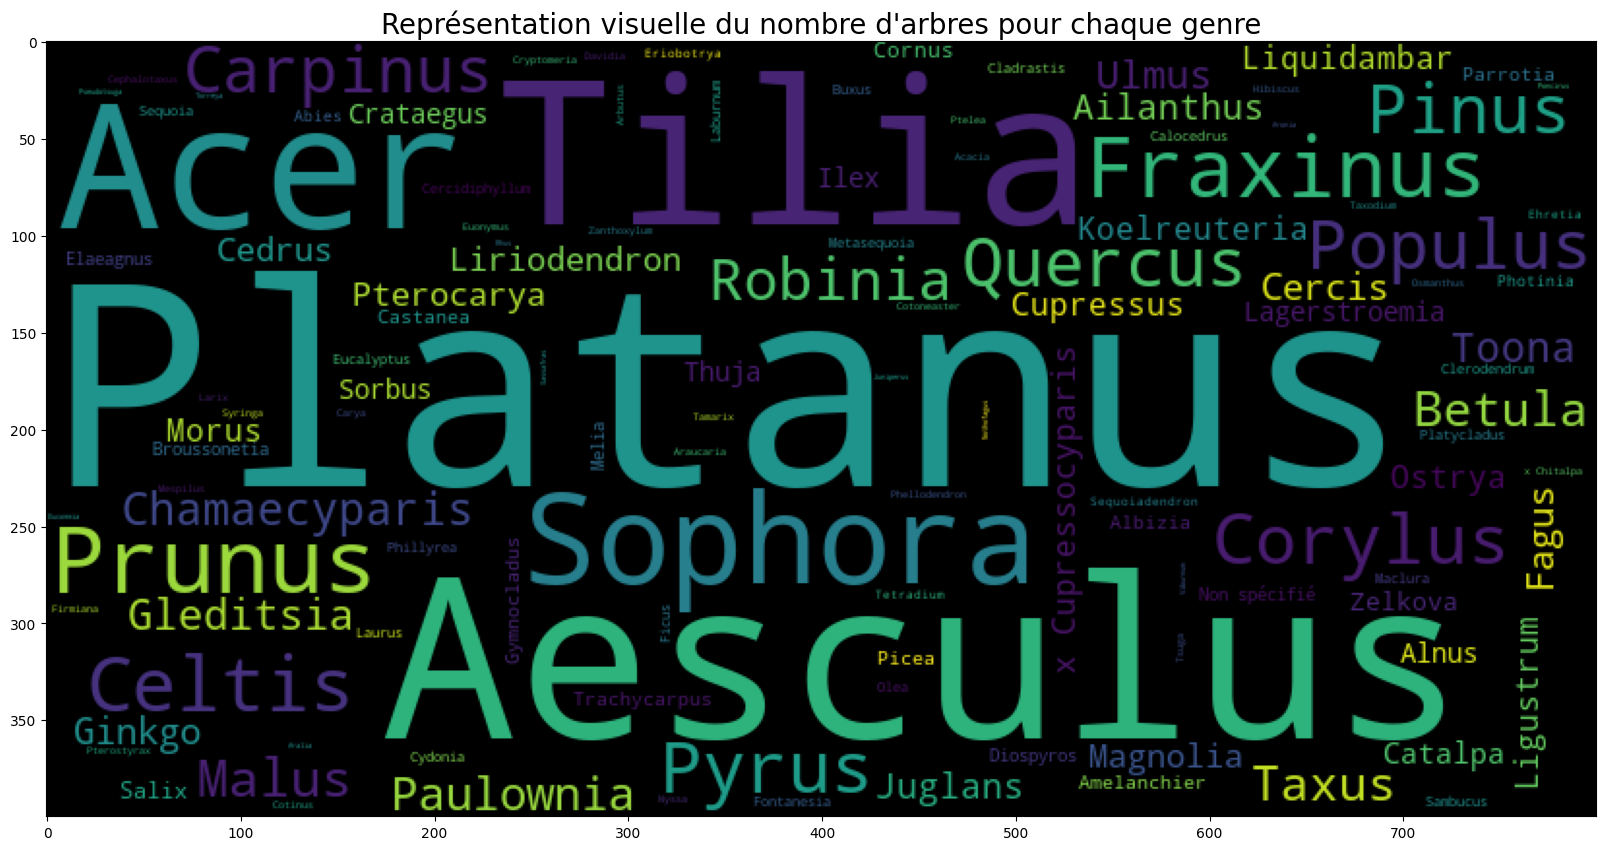

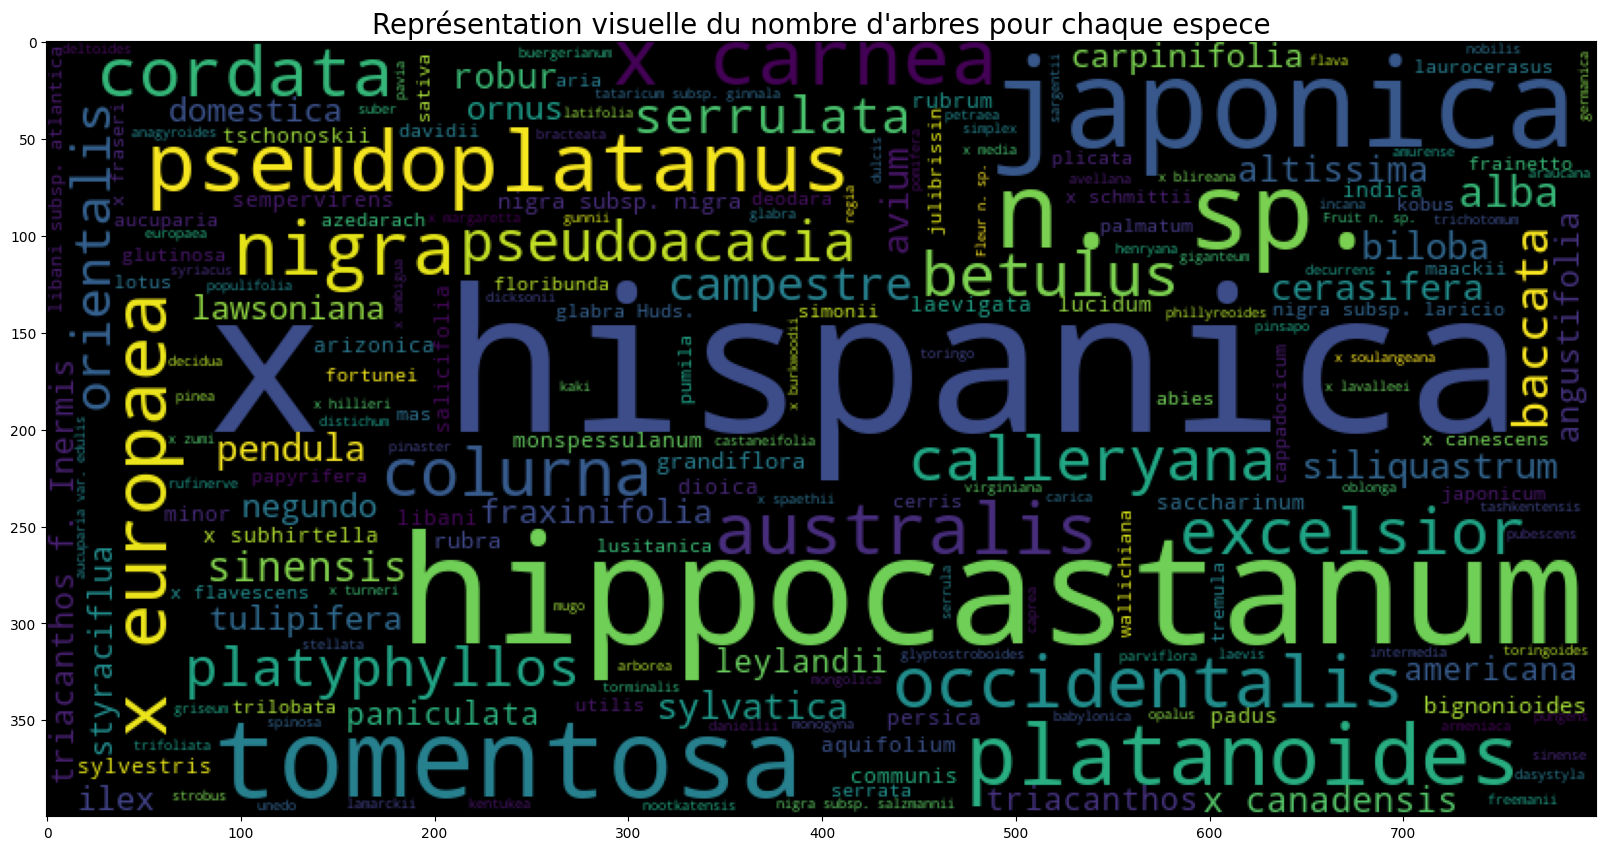

In [33]:
for var in var_high_cardinality:
    var_occurences = cleaned_data[var].value_counts().to_dict()
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(var_occurences)
    plt.figure(figsize=(20,15))
    plt.title("Représentation visuelle du nombre d'arbres pour chaque " + var, fontsize=20)
    plt.imshow(wordcloud)

15 doublons pour geo_point_2d_a
12 doublons pour geo_point_2d_b


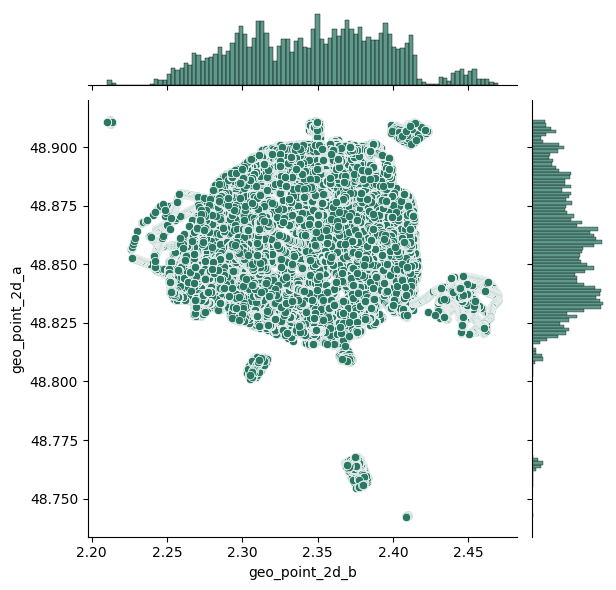

In [34]:
columns = ['geo_point_2d_a', 'geo_point_2d_b']
for column in columns:
    print(cleaned_data[column].duplicated().sum(), 'doublons pour', column)

sns.jointplot(x='geo_point_2d_b', y='geo_point_2d_a', data=cleaned_data, color = '#2A7764')

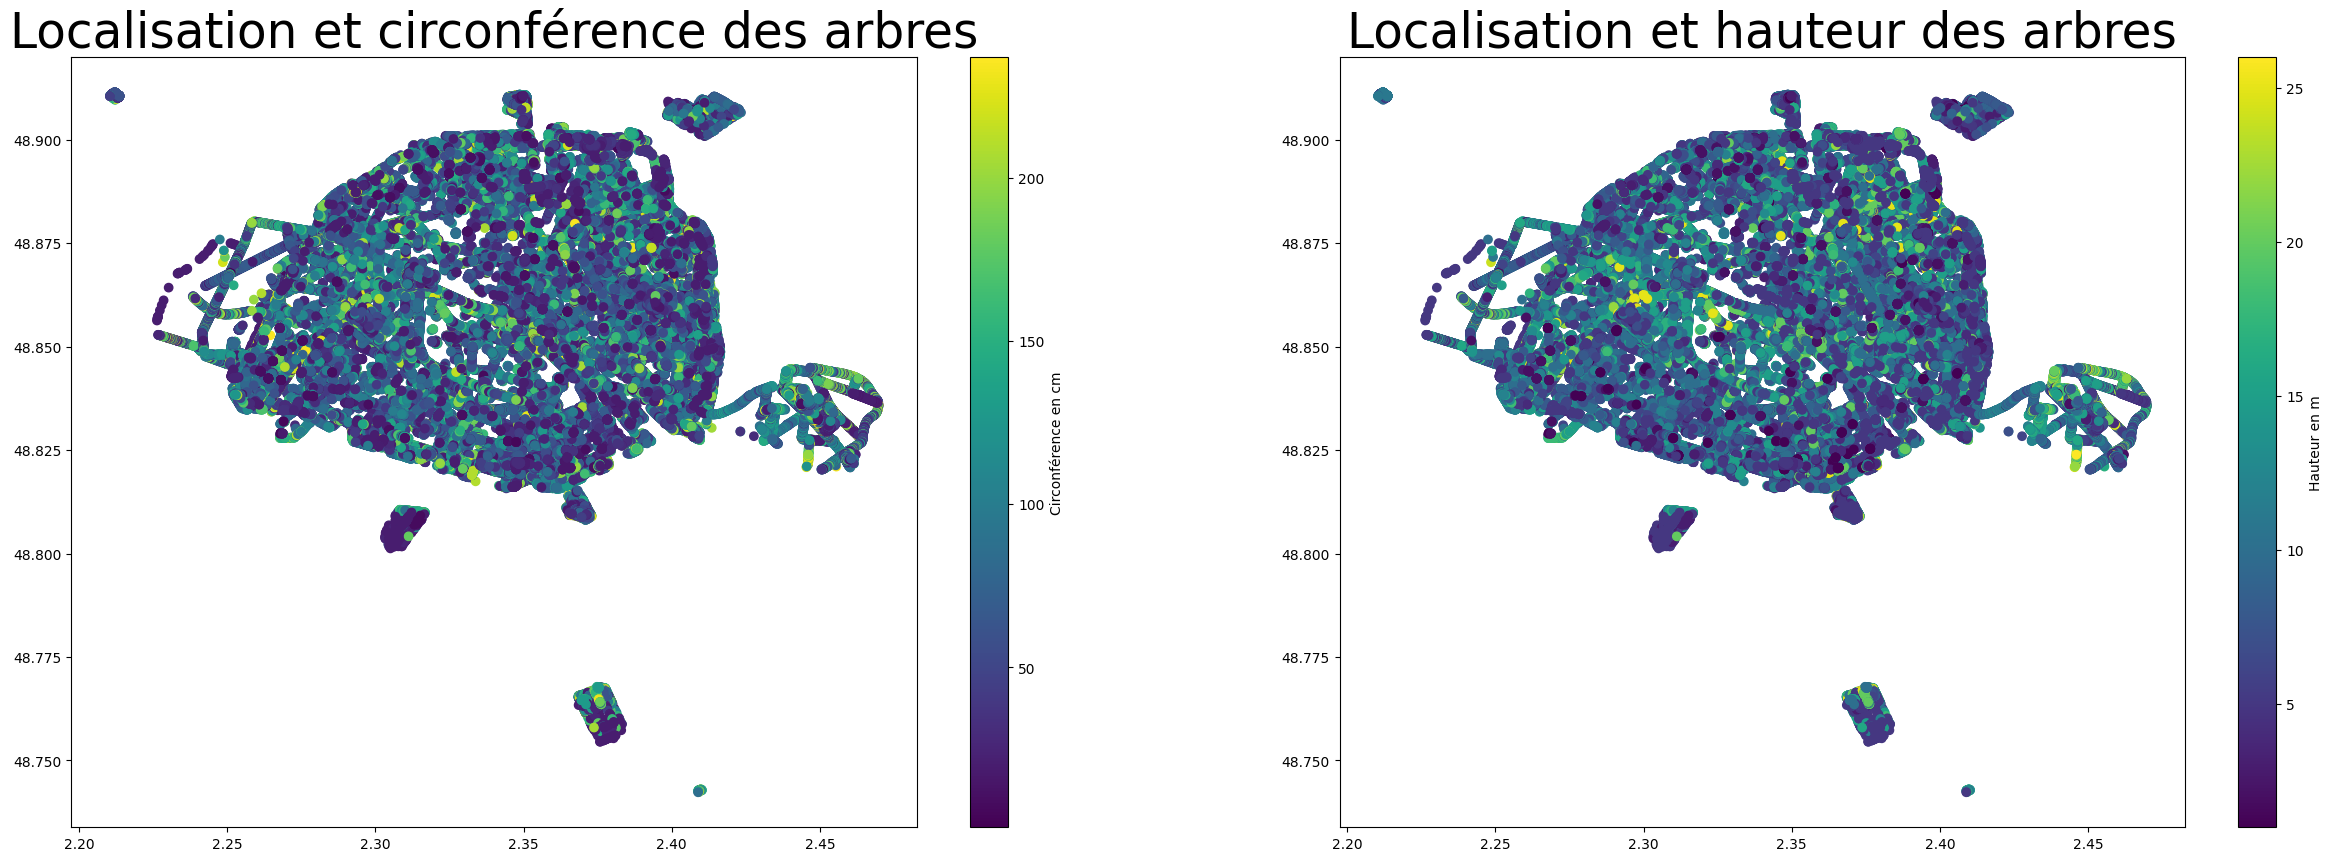

In [36]:
x=cleaned_data["geo_point_2d_b"]
y=cleaned_data["geo_point_2d_a"]

def heatmap_plot(data, var, label, title):
    plt.scatter(x, y, c=cleaned_data[var])
    plt.title(title, fontsize=35)
    plt.colorbar(label=label)

plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
heatmap_plot(cleaned_data, 'circonference_cm', "Circonférence en cm", "Localisation et circonférence des arbres")

plt.subplot(1, 2, 2)
heatmap_plot(cleaned_data, 'hauteur_m', "Hauteur en m", "Localisation et hauteur des arbres")